In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Выявить наличие ошибочных данных

Следует отметить, что переменные, Y, X2 — X4 непрерывные, X1, X5, X8 — категориальные переменные.

Задача работы состоит в построении уравнения множественной регрессии для предложенных данных в виде:
$$Y=f(X_1,X_2,X_3,...,X_{54})$$

Исследуя распределение значиний каждого столбца, выяснили что некотороые данные не подчиняются нормальному закону распределения, поэтому мы исключаем их из выборки. Далее строим попарную корреляционную матрицу для дальнейшего исследования выбросов данных.

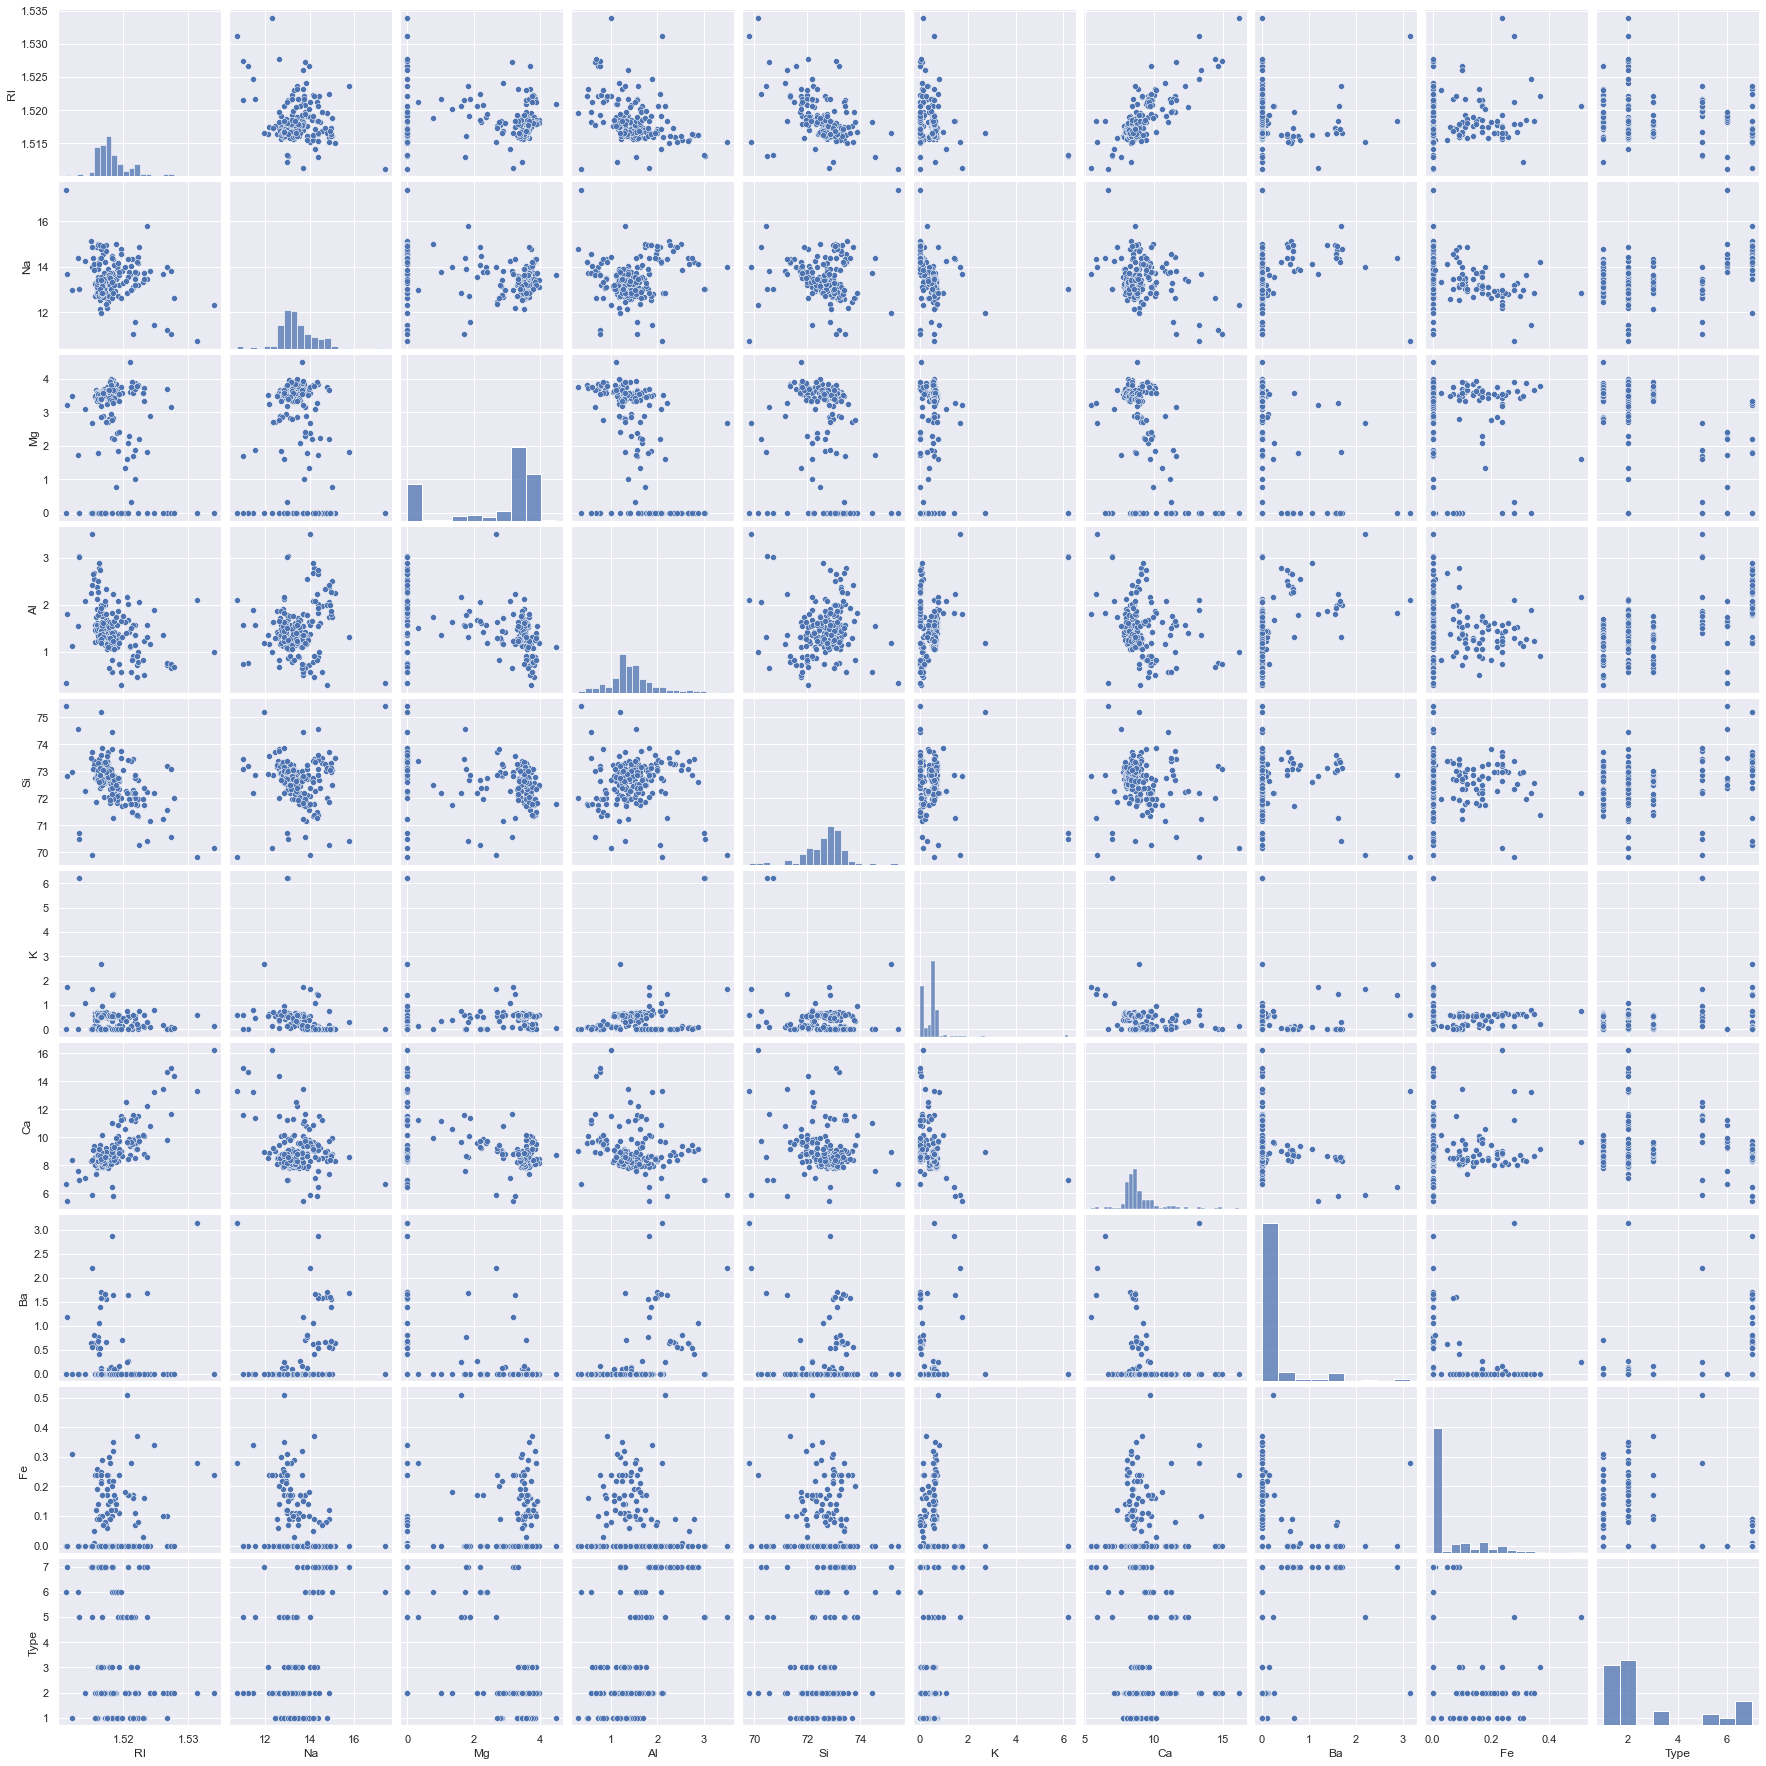

In [5]:
sns.set()
sns.pairplot(df)

<Axes:>

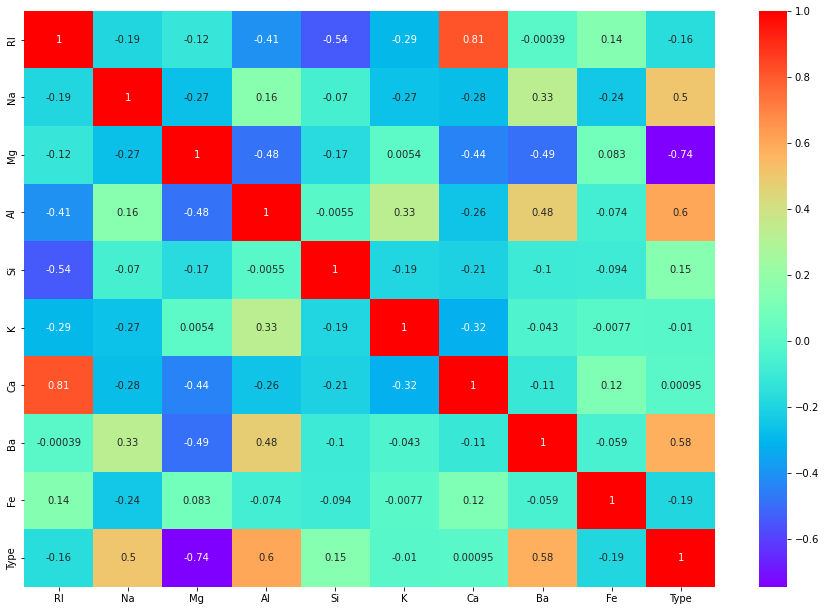

In [4]:
correlation = df.corr()
fig = plt.figure()
axes = fig.add_axes([0,0,2,2])
sns.heatmap(correlation, annot=True, cmap='rainbow')

In [5]:
np.linalg.matrix_rank(correlation)

10

In [6]:
np.linalg.det(correlation)

3.8799781156537654e-05

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df1 = df.drop(['K', 'Ca'], axis=1) # убираем кальций и калий из-за низкой корреляции с целевым параметром

<Axes:>

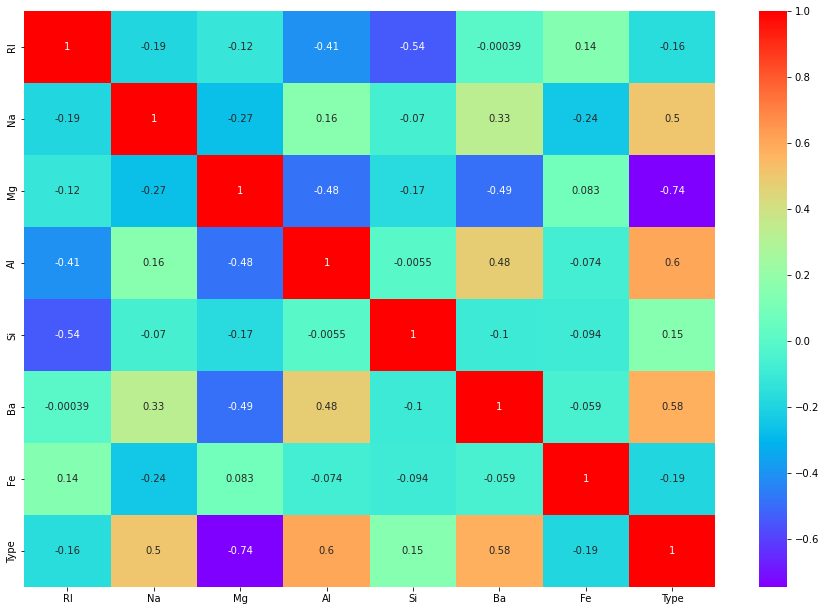

In [9]:
correlation = df1.corr()
fig = plt.figure()
axes = fig.add_axes([0,0,2,2])
sns.heatmap(correlation, annot=True, cmap='rainbow')

In [10]:
np.linalg.matrix_rank(correlation)

8

In [11]:
np.linalg.det(correlation) # Определитель матрицы

0.021981742569662385

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df1.iloc[:,0:7].values
Y = df1.iloc[:,7].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)
print(my_model.intercept_,my_model.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))

print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

print('R_2:', metrics.r2_score(Y_test,y_pred))

-104.04316142470918 [46.05478416  0.7190313  -0.69980983  1.11117333  0.37972987  0.38974951
 -1.50565461]
MAE: 0.693579131093704
MSE: 0.9172791490228481
R_2: 0.7777042328426331


1.51768
25-й перцентиль:1.5165250000000001, 75-й перцентиль: 1.519155, IQR: 0.00262999999999991,  Гарницы выбросов: [1.5125800000000003, 1.5231].


count    197.000000
mean       1.517899
std        0.001956
min        1.512990
25%        1.516510
50%        1.517610
75%        1.518720
max        1.523000
Name: RI, dtype: float64

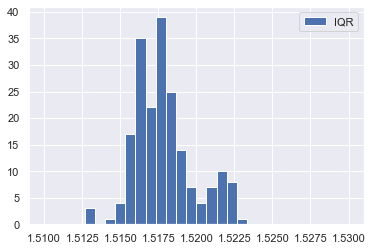

In [151]:
median = df1.RI.median()
print(median)
IQR = df1.RI.quantile(0.75, interpolation='midpoint') - df1.RI.quantile(0.25, interpolation='midpoint')
perc25 = df1.RI.quantile(0.25, interpolation='midpoint')
perc75 = df1.RI.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df1.RI.loc[df1.RI.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=30,
                                                                    range=(1.51,1.53),
                                                                    label='IQR')
plt.legend()
df1 = df1.loc[df1.RI.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df1.RI.describe()

13.29
25-й перцентиль:12.93, 75-й перцентиль: 13.87, IQR: 0.9399999999999995,  Гарницы выбросов: [11.52, 15.279999999999998].


count    196.000000
mean      13.434235
std        0.680943
min       11.560000
25%       12.930000
50%       13.295000
75%       13.872500
max       15.150000
Name: Na, dtype: float64

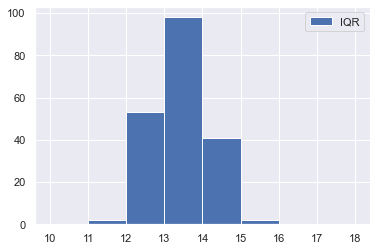

In [152]:
median = df1.Na.median()
print(median)
IQR = df1.Na.quantile(0.75, interpolation='midpoint') - df1.Na.quantile(0.25, interpolation='midpoint')
perc25 = df1.Na.quantile(0.25, interpolation='midpoint')
perc75 = df1.Na.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df1.Na.loc[df1.Na.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=8,
                                                                    range=(10,18),
                                                                    label='IQR')
plt.legend()
df1 = df1.loc[df1.Na.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df1.Na.describe()

1.39
25-й перцентиль:1.205, 75-й перцентиль: 1.6349999999999998, IQR: 0.4299999999999997,  Гарницы выбросов: [0.5600000000000005, 2.2799999999999994].


count    178.000000
mean       1.409157
std        0.330090
min        0.580000
25%        1.210000
50%        1.360000
75%        1.570000
max        2.270000
Name: Al, dtype: float64

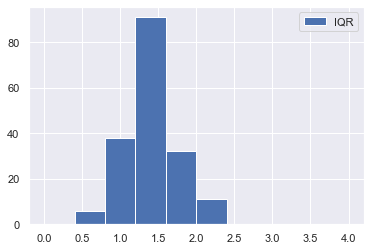

In [153]:
median = df1.Al.median()
print(median)
IQR = df1.Al.quantile(0.75, interpolation='midpoint') - df1.Al.quantile(0.25, interpolation='midpoint')
perc25 = df1.Al.quantile(0.25, interpolation='midpoint')
perc75 = df1.Al.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df1.Al.loc[df1.Al.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=10,
                                                                    range=(0,4),
                                                                    label='IQR')
plt.legend()
df1 = df1.loc[df1.Al.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df1.Al.describe()

72.80000000000001
25-й перцентиль:72.38, 75-й перцентиль: 73.065, IQR: 0.6850000000000023,  Гарницы выбросов: [71.35249999999999, 74.0925].


count    173.000000
mean      72.726936
std        0.494292
min       71.360000
25%       72.390000
50%       72.810000
75%       73.060000
max       73.880000
Name: Si, dtype: float64

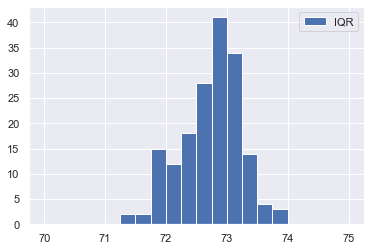

In [154]:
median = df1.Si.median()
print(median)
IQR = df1.Si.quantile(0.75, interpolation='midpoint') - df1.Si.quantile(0.25, interpolation='midpoint')
perc25 = df1.Si.quantile(0.25, interpolation='midpoint')
perc75 = df1.Si.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df1.Si.loc[df1.Si.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=20,
                                                                    range=(70,75),
                                                                    label='IQR')
plt.legend()
df1 = df1.loc[df1.Si.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df1.Si.describe()

In [211]:
X = df1.iloc[:,0:7].values
Y = df1.iloc[:,7].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)
print(my_model.intercept_,my_model.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))

print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

print('R_2:', metrics.r2_score(Y_test,y_pred))

40.67515557667607 [-32.17829693   0.55098963  -0.79213623   1.18748507   0.05347756
   0.51871707  -0.42674981]
MAE: 0.6404812405910594
MSE: 0.7539256828349578
R_2: 0.8126272935307237


### Анализируя выборку делаем вывод, что набор данных хорошо поддается анализу с помощью Линейной Регрессии
   1. Коэффициент детерминации больше 0,8 --> можно доверять данной модели.
   2. Если посмотреть на корреляционную матрицу можно сделать вывод, что тип стекла с достаточной точностью определяется исходя из содержанрия Mg.